In [1]:
import pandas as pd
import numpy as np
import scipy.stats.stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import seaborn as sns
import itertools
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/ravit/Downloads/Iris.csv')

In [3]:
x=data.drop(['Species','Petal.Width'],axis=1)

In [4]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [5]:
y= data.iloc[:,-2]

In [6]:
y.head()

0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: Petal.Width, dtype: float64

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_tfm = PolynomialFeatures(degree = 3,
 interaction_only=False,
include_bias=False)


In [24]:
poly_tfm.fit(x)
poly_features = poly_tfm.transform(x)
print(poly_features)
print(poly_features.shape)


[[  5.1     3.5     1.4   ...  17.15    6.86    2.744]
 [  4.9     3.      1.4   ...  12.6     5.88    2.744]
 [  4.7     3.2     1.3   ...  13.312   5.408   2.197]
 ...
 [  6.5     3.      5.2   ...  46.8    81.12  140.608]
 [  6.2     3.4     5.4   ...  62.424  99.144 157.464]
 [  5.9     3.      5.1   ...  45.9    78.03  132.651]]
(150, 19)


In [25]:
x.iloc[0,:]


Sepal.Length    5.1
Sepal.Width     3.5
Petal.Length    1.4
Name: 0, dtype: float64

In [26]:
poly_features[0]


array([  5.1  ,   3.5  ,   1.4  ,  26.01 ,  17.85 ,   7.14 ,  12.25 ,
         4.9  ,   1.96 , 132.651,  91.035,  36.414,  62.475,  24.99 ,
         9.996,  42.875,  17.15 ,   6.86 ,   2.744])

In [27]:
#print("{0:.3f}".format(a))
for a in poly_features[0]:
 print("{0:.2f}".format(a))

5.10
3.50
1.40
26.01
17.85
7.14
12.25
4.90
1.96
132.65
91.03
36.41
62.47
24.99
10.00
42.88
17.15
6.86
2.74


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features , y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 19)
(30, 19)
(120,)
(30,)


In [29]:
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train,y_train)


LinearRegression()

In [30]:
print("poly_model.coef_: ", poly_model.coef_)
print("poly_model.intercept_: ", poly_model.intercept_)


poly_model.coef_:  [-1.06297416e+01 -1.04720784e+01  1.29911759e+00  5.44146861e-01
  4.95848481e+00  7.99430733e-02 -6.58599075e-01 -1.29497669e+00
  1.99815780e-01  1.09344755e-01 -7.84062087e-01 -6.78224518e-02
  5.23261111e-01  3.54307208e-01 -3.17599712e-02 -2.10109322e-01
 -1.38832425e-01  4.48592126e-03 -3.45979121e-03]
poly_model.intercept_:  29.57378255447092


In [31]:
y_predicted = poly_model.predict(X_test)
test_residuals = y_test - y_predicted

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_predicted)
print("RMSE: ", rmse)
print("R2 Score: ", r2)

RMSE:  0.20862176744470076
R2 Score:  0.9093458824166823


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv('C:/Users/ravit/Downloads/Iris.csv')
x=data.drop(['Species','Petal.Width'],axis=1)
y= data.iloc[:,-2]
train_rmse_errors = []
test_rmse_errors = []
for d in range(1,6):
 # Create poly data set for degree d=1,2,3,4,5 in each loop iteration
 polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
 poly_features = polynomial_converter.fit_transform(x)

 # Split this new poly data set
 X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=0)

 # Create LR model and train it on new polynomial feature set
 model= LinearRegression()
 model.fit(X_train,y_train)

 # Predict on both train and test data
 train_pred = model.predict(X_train)
 test_pred = model.predict(X_test)

 # Compute Errors on Train and Test Set and append to lists
 train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
 test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
 train_rmse_errors.append(train_RMSE)
 test_rmse_errors.append(test_RMSE)

In [20]:
train_rmse_errors


[0.17891110992254677,
 0.17078508727402453,
 0.15642238948490714,
 0.14363955018676938,
 0.11879844455282197]

In [21]:
test_rmse_errors


[0.2284037468786033,
 0.22014122452501497,
 0.20862176744470076,
 0.25230831695967476,
 0.797081566371795]

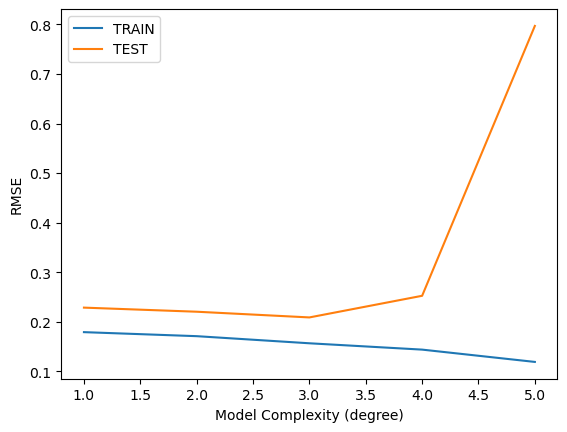

In [22]:
plt.plot(range(1,6),train_rmse_errors,label='TRAIN')
plt.plot(range(1,6),test_rmse_errors,label='TEST')
plt.xlabel("Model Complexity (degree)")
plt.ylabel("RMSE")
plt.legend();


In [ ]:
model.fit(X_train2,y_train2,)
model.coef_
model.intercept_